# Final Project: PanClassif

Import libraries

In [1]:
# import panclassif as pc
import pandas as pd
import numpy as np
from panclassif import dataProcess, featSelect, upsampled, binary_merge, multi_merge, classification
from sklearn.ensemble import RandomForestClassifier

## Reference Model

#### Rare cancers

Cancer files: ['SARC.csv.gz', 'PCPG.csv.gz', 'THYM.csv.gz', 'KICH.csv.gz', 'CHOL.csv.gz']
Normal files: ['PCPG.norm.csv.gz', 'THYM.norm.csv.gz', 'CHOL.norm.csv.gz', 'KICH.norm.csv.gz', 'SARC.norm.csv.gz']
Feature selection process is running...
Processing file index: 0
Doing feature selection for CHOL
Processing file index: 1
Doing feature selection for KICH
Processing file index: 2
Doing feature selection for PCPG
Processing file index: 3
Doing feature selection for SARC
Processing file index: 4
Doing feature selection for THYM
Feature selection process has ended

Data process is running
Unique genes: 25
CHOL
(45, 25)
(9, 25)
KICH
(91, 25)
(25, 25)
PCPG
(187, 25)
(3, 25)
SARC
(265, 25)
(2, 25)
THYM
(122, 25)
(2, 25)
Data process has ended

Upsampling on train data is running
Upsampling on train data has ended

Merging for binary has started
Merging for binary has ended

Merging for multiclass has started
Merging for multiclass has ended



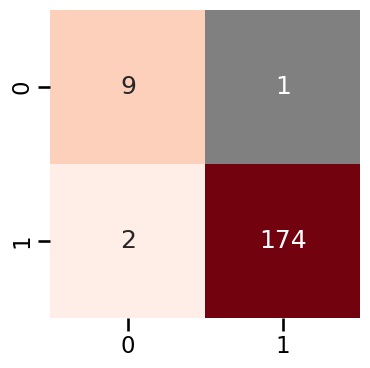

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.99      0.99      0.99       176

    accuracy                           0.98       186
   macro avg       0.91      0.94      0.92       186
weighted avg       0.98      0.98      0.98       186

MCC Score:  0.8496988840904508


<Figure size 640x480 with 0 Axes>

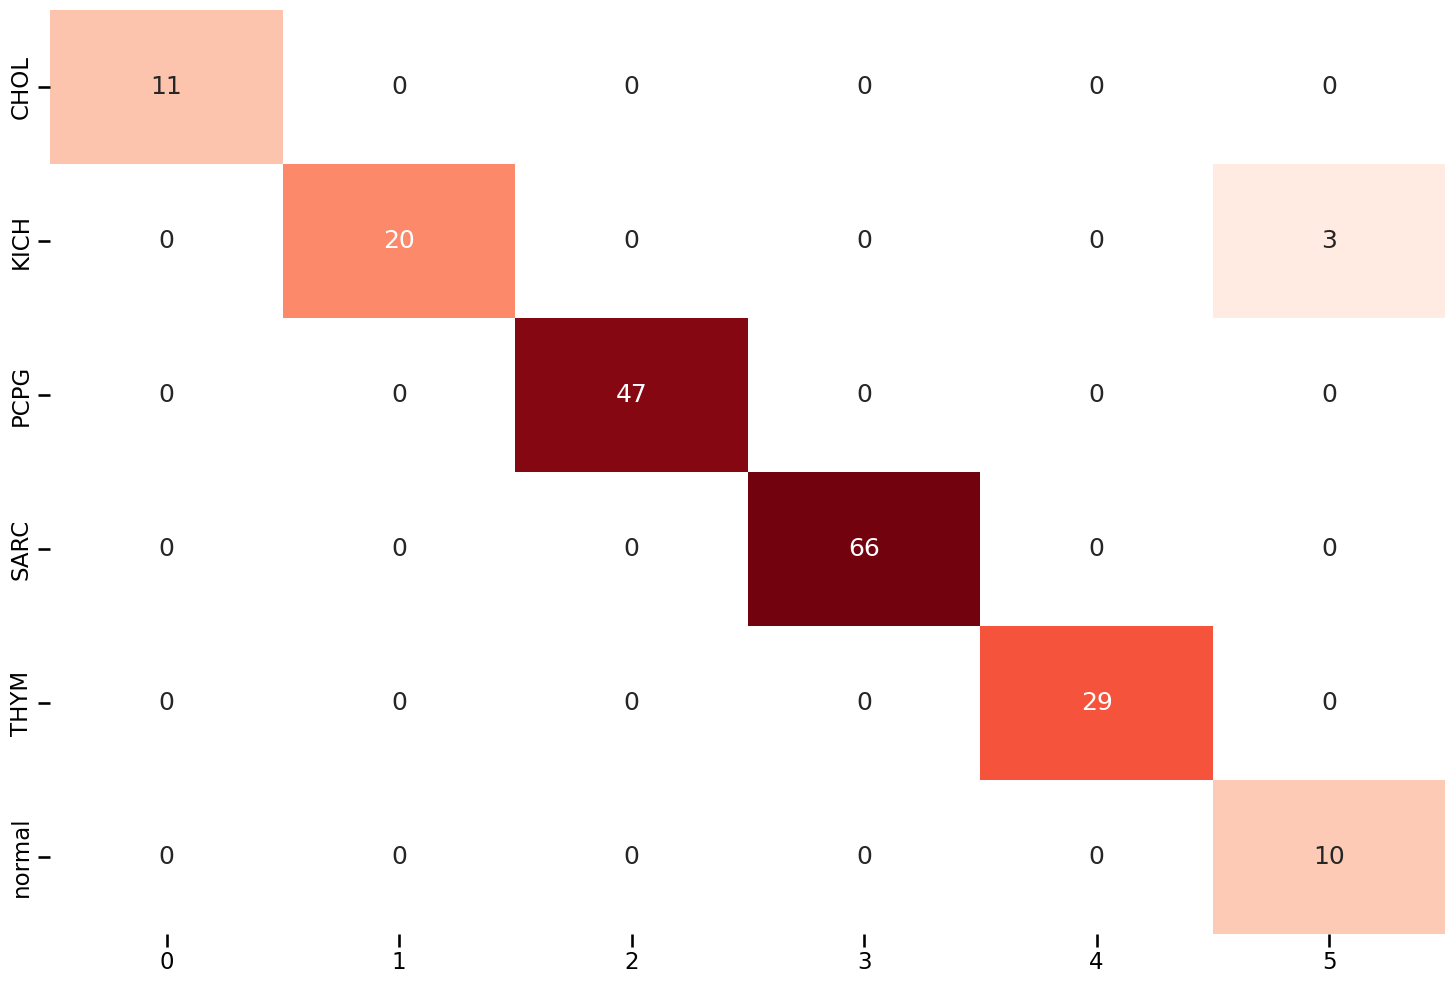

              precision    recall  f1-score   support

        CHOL       1.00      1.00      1.00        11
        KICH       1.00      0.87      0.93        23
        PCPG       1.00      1.00      1.00        47
        SARC       1.00      1.00      1.00        66
        THYM       1.00      1.00      1.00        29
      normal       0.77      1.00      0.87        10

    accuracy                           0.98       186
   macro avg       0.96      0.98      0.97       186
weighted avg       0.99      0.98      0.98       186

MCC Score:  0.9792601680316643


<Figure size 640x480 with 0 Axes>

In [2]:
homepath_rare = './rare'
cancerpath_rare = './rare/cancer'
normalpath_rare = './rare/normal'

smoothed_cancer_rare = './rare/cancer_smoothed'
smoothed_normal_rare = './rare/normal_smoothed'

# Feature selection
names_rare = featSelect(homepath_rare,cancerpath_rare,normalpath_rare, k=5)

# Data process
dataProcess(homepath=homepath_rare,
            names=names_rare,
            cancerpath=cancerpath_rare,
            smoothed_cancer=smoothed_cancer_rare,
            smoothed_normal=smoothed_normal_rare,
            scale_mode=0,
            cancer='CHOL')

# Upsample training data
upsampled(names_rare, homepath_rare)

# Merge data
binary_merge(names_rare, homepath_rare)
multi_merge(names_rare, homepath_rare)

# Classification
classification(homepath_rare, RandomForestClassifier(n_estimators=100), mode="binary", save_model="RF")
classification(homepath_rare, RandomForestClassifier(n_estimators=100), mode="multi", save_model="RF")

#### Common cancers

Cancer files: ['BRCA.csv.gz', 'LUAD.csv.gz', 'COAD.csv.gz', 'LUSC.csv.gz', 'PRAD.csv.gz', 'UCEC.csv.gz', 'READ.csv.gz']
Normal files: ['LUAD.norm.csv.gz', 'READ.norm.csv.gz', 'UCEC.norm.csv.gz', 'COAD.norm.csv.gz', 'LUSC.norm.csv.gz', 'BRCA.norm.csv.gz', 'PRAD.norm.csv.gz']
Feature selection process is running...
Processing file index: 0
Doing feature selection for BRCA
Processing file index: 1
Doing feature selection for COAD
Processing file index: 2
Doing feature selection for LUAD
Processing file index: 3
Doing feature selection for LUSC
Processing file index: 4
Doing feature selection for PRAD
Processing file index: 5
Doing feature selection for READ
Processing file index: 6
Doing feature selection for UCEC
Feature selection process has ended

Data process is running
Unique genes: 35
BRCA
(1212, 35)
(112, 35)
COAD
(328, 35)
(26, 35)
LUAD
(576, 35)
(58, 35)
LUSC
(552, 35)
(51, 35)
PRAD
(550, 35)
(52, 35)
READ
(105, 35)
(6, 35)
UCEC
(201, 35)
(7, 35)
Data process has ended

Upsamplin

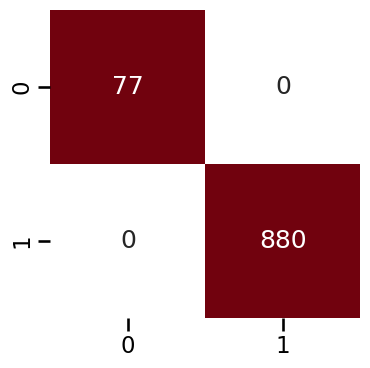

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00       880

    accuracy                           1.00       957
   macro avg       1.00      1.00      1.00       957
weighted avg       1.00      1.00      1.00       957

MCC Score:  1.0


<Figure size 640x480 with 0 Axes>

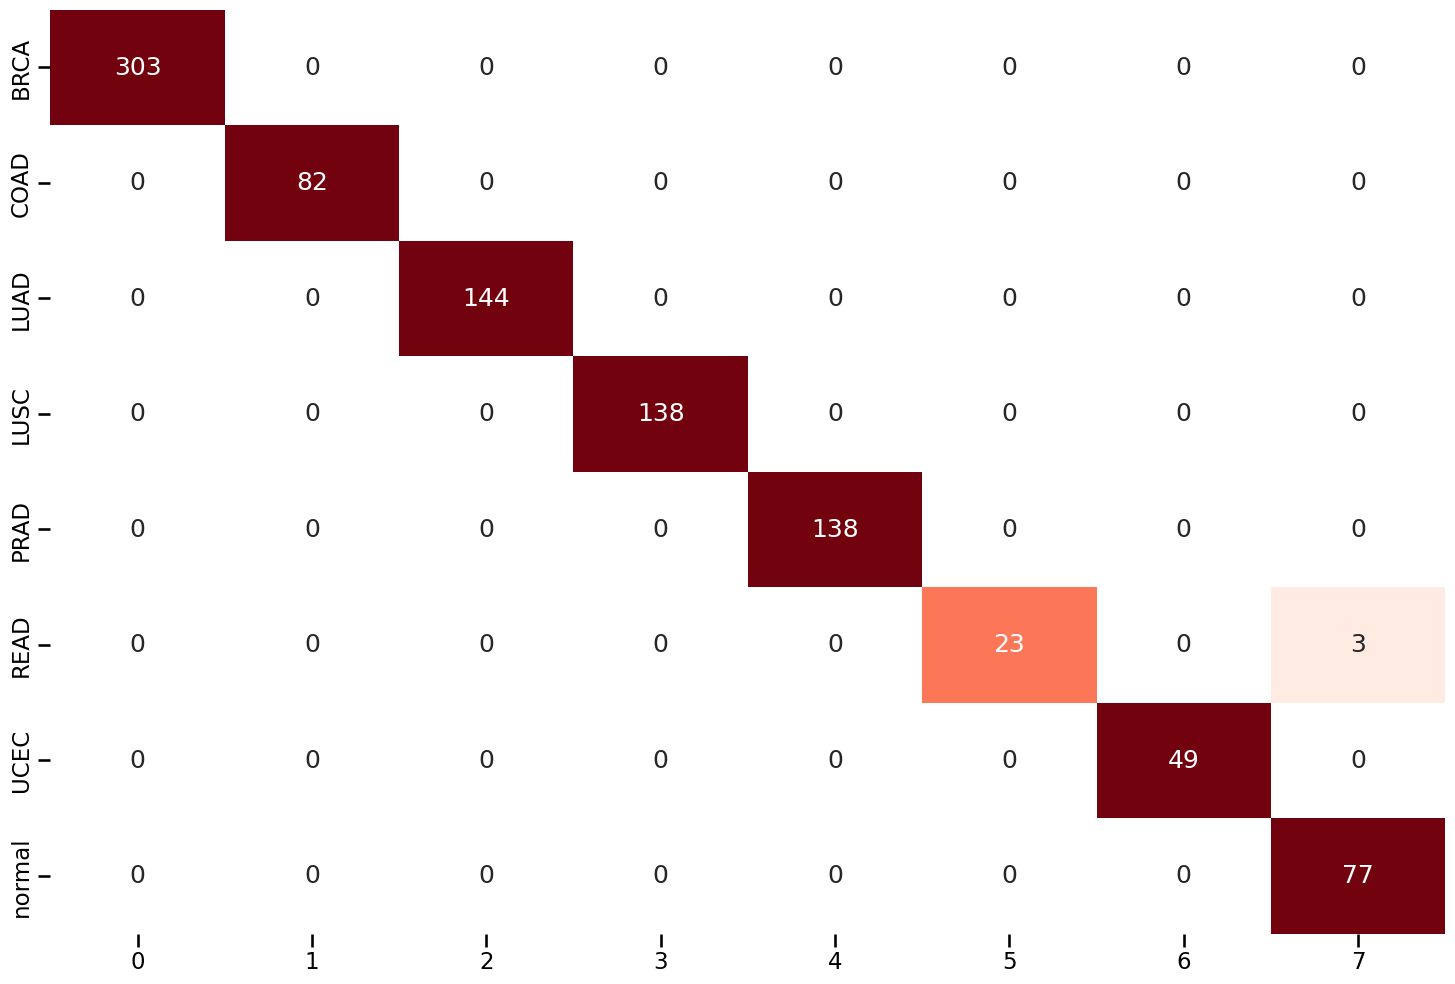

              precision    recall  f1-score   support

        BRCA       1.00      1.00      1.00       303
        COAD       1.00      1.00      1.00        82
        LUAD       1.00      1.00      1.00       144
        LUSC       1.00      1.00      1.00       138
        PRAD       1.00      1.00      1.00       138
        READ       1.00      0.88      0.94        26
        UCEC       1.00      1.00      1.00        49
      normal       0.96      1.00      0.98        77

    accuracy                           1.00       957
   macro avg       1.00      0.99      0.99       957
weighted avg       1.00      1.00      1.00       957

MCC Score:  0.9961805806899277


<Figure size 640x480 with 0 Axes>

In [3]:
homepath_common = './common/'
cancerpath_common = './common/cancer'
normalpath_common = './common/normal'

smoothed_cancer_common = './common/cancer_smoothed'
smoothed_normal_common = './common/normal_smoothed'

# Feature selection
names_common = featSelect(homepath_common,cancerpath_common,normalpath_common, k=5)

# Data process
dataProcess(homepath=homepath_common,
            names=names_common,
            cancerpath=cancerpath_common,
            smoothed_cancer=smoothed_cancer_common,
            smoothed_normal=smoothed_normal_common,
            scale_mode=0,
            cancer='BRCA')

# Upsample training data
upsampled(names_common, homepath_common)

# Merge data
binary_merge(names_common, homepath_common)
multi_merge(names_common, homepath_common)

# Classification
classification(homepath_common, RandomForestClassifier(n_estimators=100), mode="binary", save_model="RF")
classification(homepath_common, RandomForestClassifier(n_estimators=100), mode="multi", save_model="RF")